- 파일을 사용할 때는 open() 함수를 사용합니다.
- open() 함수를 사용할 때는 세 개의 인자를 사용합니다.
  - 위치인자 1 - 파일의 경로
  - 위치인자 2 - 사용 모드
    - 텍스트 파일의 경우 - r, w
    - 바이너리 파일의 경우 - rb, wb
  - 키워드인자 encoding - 텍스트 모드의 경우 인코딩 방식
  - file 객체를 반환
  - 다 사용하고 난 후 close() 메서드 호출!
- 텍스트 파일을 읽는 메서드
  file.read()
  file.readline()
  file.readlines()
- 텍스트 파일을 쓰는 메서드
  file.write()


In [4]:
file = open("files/sample.txt", "r", encoding="utf-8")
print(file.read())
file.close()

    진달래꽃
                김소월

나 보기가 역겨워
가실 때에는
말없이 고이 보내 드리우리다

영변에 약산
진달래꽃
아름 따다 가실 길에 뿌리우리다

가시는 걸음걸음
놓인 그 꽃을
사뿐히 즈려밟고 가시옵소서

나 보기가 역겨워
가실 때에는
죽어도 아니 눈물 흘리우리다


In [5]:
file = open("files/sample.txt", "r", encoding="utf-8")
while True:
    line = file.readline()
    if not line:
        break
    print(line)
file.close()

    진달래꽃

                김소월



나 보기가 역겨워

가실 때에는

말없이 고이 보내 드리우리다



영변에 약산

진달래꽃

아름 따다 가실 길에 뿌리우리다



가시는 걸음걸음

놓인 그 꽃을

사뿐히 즈려밟고 가시옵소서



나 보기가 역겨워

가실 때에는

죽어도 아니 눈물 흘리우리다


In [6]:
file = open("files/sample.txt", "r", encoding="utf-8")
while True:
    line = file.readline()
    if not line:
        break
    print(line.strip())
file.close()

진달래꽃
김소월

나 보기가 역겨워
가실 때에는
말없이 고이 보내 드리우리다

영변에 약산
진달래꽃
아름 따다 가실 길에 뿌리우리다

가시는 걸음걸음
놓인 그 꽃을
사뿐히 즈려밟고 가시옵소서

나 보기가 역겨워
가실 때에는
죽어도 아니 눈물 흘리우리다


In [7]:
file = open("files/sample.txt", "r", encoding="utf-8")
lines = file.readlines()
for line in lines:
    print(line.strip())
file.close()

진달래꽃
김소월

나 보기가 역겨워
가실 때에는
말없이 고이 보내 드리우리다

영변에 약산
진달래꽃
아름 따다 가실 길에 뿌리우리다

가시는 걸음걸음
놓인 그 꽃을
사뿐히 즈려밟고 가시옵소서

나 보기가 역겨워
가실 때에는
죽어도 아니 눈물 흘리우리다


In [8]:
file = open("files/sample.txt", "r", encoding="utf-8")
lines = list(file)
for line in lines:
    print(line.strip())
file.close()

진달래꽃
김소월

나 보기가 역겨워
가실 때에는
말없이 고이 보내 드리우리다

영변에 약산
진달래꽃
아름 따다 가실 길에 뿌리우리다

가시는 걸음걸음
놓인 그 꽃을
사뿐히 즈려밟고 가시옵소서

나 보기가 역겨워
가실 때에는
죽어도 아니 눈물 흘리우리다


### Librosa를 활용한 오디오 분석

- 설치
  - `conda install librosa`
  - 또는 `pip install librosa`
  - 경우에 따라서 anaconda의 librosa가 시스템 충돌로 동작하지 않는 경우가 있습니다. 이 경우 `conda remove librosa`후 `pip install librosa`로 재설치해 봅시다.


In [2]:
# 파일 읽기
import librosa
import numpy as np

import librosa.display
import matplotlib.pyplot as plt

# Load the mp3 file
audio_path = 'files/01.mp3'
y, sr = librosa.load(audio_path)


In [3]:

# 기본 정보 추출 - duration, tempo, sample rate
# sample rate - 물리 특성이 아닌 파일 특성으로 초당 샘플링 횟수를 의미
duration = librosa.get_duration(y=y, sr=sr)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
print(f"Duration: {duration} seconds")
print(f"Sample Rate: {sr} Hz")
print(f"Tempo: {tempo} BPM")

Duration: 3.1440362811791385 seconds
Sample Rate: 22050 Hz
Tempo: [129.19921875] BPM


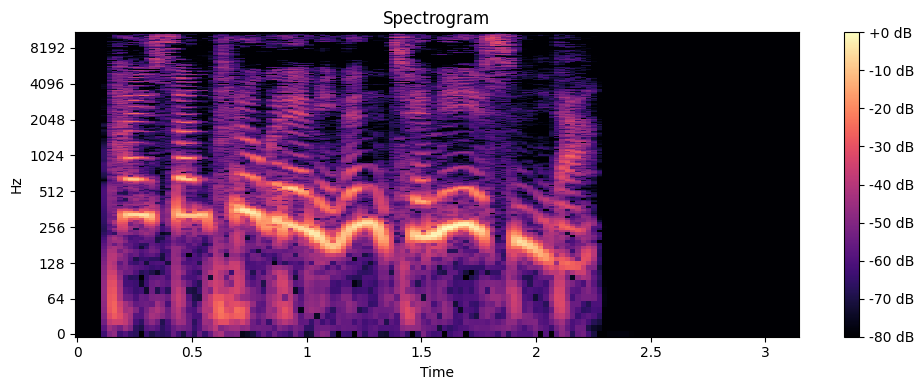

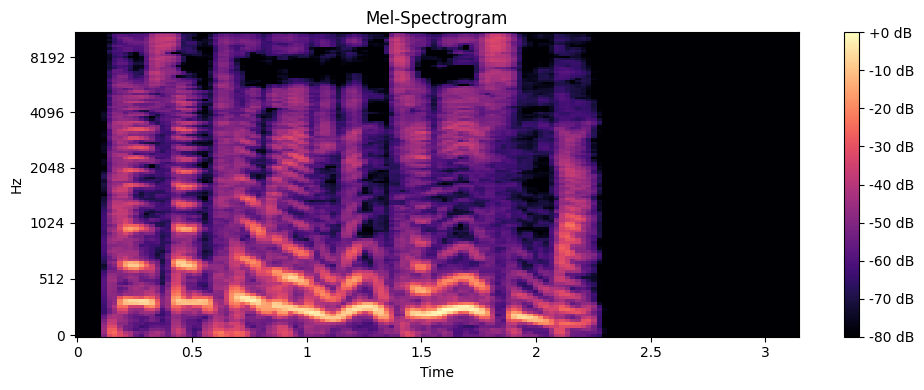

In [4]:

# 스펙트로그램 만들기
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

# 멜 스펙트로그램 만들기
plt.figure(figsize=(10, 4))
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.show()

### 간단한 데이터 정제 과정 경험 - 중복 파일을 찾아보자!


In [12]:
# 파일의 목록을 만듭니다.
raw_files = [f"files/{i:02}.mp3" for i in range(1, 13)]

import hashlib
#import os

# 해시 - 어떤 대상의 고유 핑거프린트
# 파일을 읽어서 SHA-256 알고리즘을 사용해 해시 값을 계산해 반환
# 파라미터 - 파일 이름
# 반환 - 파일의 해시 값
def hash_file(filepath):
    hasher = hashlib.sha256()
    with open(filepath, 'rb') as f:
        while chunk := f.read(8192):
            hasher.update(chunk)
    return hasher.hexdigest()

# 중복 파일 찾기
# 파일 목록을 받아서 중복된 파일을 찾아 반환
# 파라미터 - 파일 목록
# 반환 - 중복된 파일 목록
def find_duplicate_files(file_list):
    hash_dict = {}
    duplicates = []

    for file_path in file_list:
        # 파일의 해시 값 계산
        file_hash = hash_file(file_path)
        
        # 해시 값이 이미 존재하면 중복 파일로 간주
        if file_hash in hash_dict:
            duplicates.append((file_path, hash_dict[file_hash]))
        else:
            hash_dict[file_hash] = file_path

    return duplicates

duplicate_files = find_duplicate_files(raw_files)
# 결과 출력
if duplicate_files:
    print("중복된 파일 목록:")
    for duplicate in duplicate_files:
        print(f"파일: {duplicate[0]} 는 {duplicate[1]} 와 동일합니다.")
else:
    print("중복된 파일이 없습니다.")

# 중복 파일 제거
file_list = [file for file in raw_files if file not in [duplicate[0] for duplicate in duplicate_files]]

print(f"분석 대상 파일 목록 : {file_list}")



중복된 파일 목록:
파일: files/03.mp3 는 files/02.mp3 와 동일합니다.
파일: files/04.mp3 는 files/02.mp3 와 동일합니다.
파일: files/07.mp3 는 files/02.mp3 와 동일합니다.
파일: files/12.mp3 는 files/02.mp3 와 동일합니다.
분석 대상 파일 목록 : ['files/01.mp3', 'files/02.mp3', 'files/05.mp3', 'files/06.mp3', 'files/08.mp3', 'files/09.mp3', 'files/10.mp3', 'files/11.mp3']


### 실습

- 12개 파일 중 중복되지 않은 파일을 사용해 멜 스펙트로그램을 하나씩 시각화하도록 위의 코드를 수정해 봅시다.
